In [1]:
# Association Rule Mining (Market Basket Analysis)

In [2]:
# Import libraries
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder
import matplotlib.pyplot as plt

In [3]:
# Load Dataset

In [4]:
# Read without header (since your file has a single column of transactions)
data = pd.read_excel(r"C:\Users\admin\Downloads\Excelr Assignment\Association Rules\Online retail.xlsx",header=None)

In [5]:
data

,0
0,"shrimp,almonds,avocado,vegetables mix,green gr..."
1,"burgers,meatballs,eggs"
2,chutney
3,"turkey,avocado"
4,"mineral water,milk,energy bar,whole wheat rice..."
...,...
7496,"butter,light mayo,fresh bread"
7497,"burgers,frozen vegetables,eggs,french fries,ma..."
7498,chicken
7499,"escalope,green tea"


In [6]:
data.shape

(7501, 1)

In [7]:
print("Sample rows:")
print(data.head())

Sample rows:
                                                   0
0  shrimp,almonds,avocado,vegetables mix,green gr...
1                             burgers,meatballs,eggs
2                                            chutney
3                                     turkey,avocado
4  mineral water,milk,energy bar,whole wheat rice...


In [8]:
# Data Preprocessing

In [9]:
# Each row is a string of items, split by commas -> convert to list
transactions = data[0].astype(str).apply(lambda x: x.split(','))

In [10]:
# Convert transactions to one-hot encoded format
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
basket_df = pd.DataFrame(te_ary, columns=te.columns_)

In [11]:
print("\nBasket format (0/1):")
basket_df.head()


Basket format (0/1):


,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,False,True,True,False,True,False,False,False,False,False,...,False,True,False,False,True,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


In [12]:
# Frequent Itemset Mining (Apriori)

In [13]:
frequent_itemsets = apriori(basket_df, min_support=0.02, use_colnames=True)  # min_support=2%
frequent_itemsets = frequent_itemsets.sort_values("support", ascending=False)

In [14]:
print("\nFrequent itemsets (top 10):")
frequent_itemsets.head(10)


Frequent itemsets (top 10):


,support,itemsets
34,0.238368,(mineral water)
13,0.179709,(eggs)
44,0.174110,(spaghetti)
17,0.170911,(french fries)
9,0.163845,(chocolate)
24,0.132116,(green tea)
33,0.129583,(milk)
25,0.098254,(ground beef)
22,0.095321,(frozen vegetables)
38,0.095054,(pancakes)


In [15]:
# Association Rules

In [16]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules = rules.sort_values("confidence", ascending=False)

In [17]:
print("\nTop 10 Association Rules:")
rules.head(10)


Top 10 Association Rules:


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
62,(soup),(mineral water),0.050527,0.238368,0.023064,0.456464,1.914955,1.0,0.011020,1.401255,0.503221,0.086760,0.286354,0.276610
38,(olive oil),(mineral water),0.065858,0.238368,0.027596,0.419028,1.757904,1.0,0.011898,1.310962,0.461536,0.099759,0.237201,0.267400
8,(ground beef),(mineral water),0.098254,0.238368,0.040928,0.416554,1.747522,1.0,0.017507,1.305401,0.474369,0.138413,0.233952,0.294127
10,(ground beef),(spaghetti),0.098254,0.174110,0.039195,0.398915,2.291162,1.0,0.022088,1.373997,0.624943,0.168096,0.272197,0.312015
92,(cooking oil),(mineral water),0.051060,0.238368,0.020131,0.394256,1.653978,1.0,0.007960,1.257349,0.416672,0.074752,0.204676,0.239354
70,(chicken),(mineral water),0.059992,0.238368,0.022797,0.380000,1.594172,1.0,0.008497,1.228438,0.396502,0.082729,0.185958,0.237819
18,(frozen vegetables),(mineral water),0.095321,0.238368,0.035729,0.374825,1.572463,1.0,0.013007,1.218270,0.402413,0.119911,0.179164,0.262357
6,(milk),(mineral water),0.129583,0.238368,0.047994,0.370370,1.553774,1.0,0.017105,1.209650,0.409465,0.150000,0.173315,0.285856
50,(tomatoes),(mineral water),0.068391,0.238368,0.024397,0.356725,1.496530,1.0,0.008095,1.183991,0.356144,0.086402,0.155399,0.229537
24,(pancakes),(mineral water),0.095054,0.238368,0.033729,0.354839,1.488616,1.0,0.011071,1.180529,0.362712,0.112544,0.152922,0.248169


In [18]:
# Insights

In [19]:
print("\nSample Insights:")
for idx, row in rules.head(5).iterrows():
    print(f"Rule: {list(row['antecedents'])} -> {list(row['consequents'])}")
    print(f"Support: {row['support']:.3f}, Confidence: {row['confidence']:.3f}, Lift: {row['lift']:.3f}\n")


Sample Insights:
Rule: ['soup'] -> ['mineral water']
Support: 0.023, Confidence: 0.456, Lift: 1.915

Rule: ['olive oil'] -> ['mineral water']
Support: 0.028, Confidence: 0.419, Lift: 1.758

Rule: ['ground beef'] -> ['mineral water']
Support: 0.041, Confidence: 0.417, Lift: 1.748

Rule: ['ground beef'] -> ['spaghetti']
Support: 0.039, Confidence: 0.399, Lift: 2.291

Rule: ['cooking oil'] -> ['mineral water']
Support: 0.020, Confidence: 0.394, Lift: 1.654



In [20]:
# Visualization: Support vs Confidence

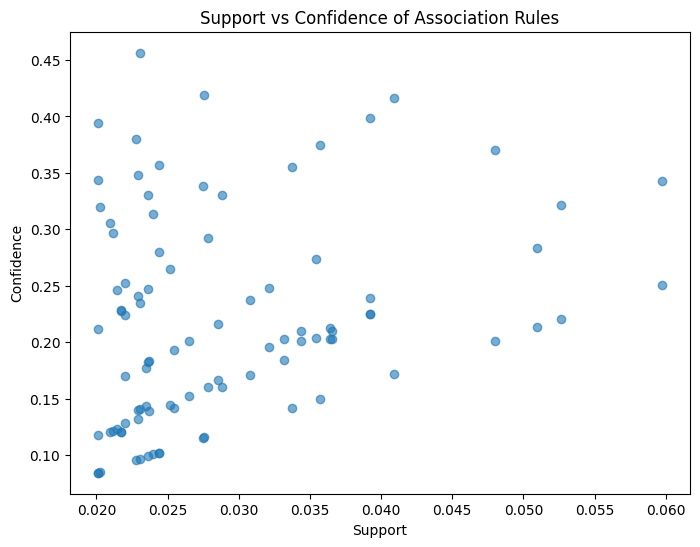

In [21]:
plt.figure(figsize=(8,6))
plt.scatter(rules['support'], rules['confidence'], alpha=0.6)
plt.xlabel("Support")
plt.ylabel("Confidence")
plt.title("Support vs Confidence of Association Rules")
plt.show()

In [22]:
# Interview Questions and answers